In [9]:
import os
import pandas as pd

# folder_path = r"C:\Users\raned\Documents\Github\POSTMODERATION\TrainingData"
# print("Files in TrainingData folder:")
# print(os.listdir(folder_path))

# file_path = os.path.join(folder_path, "combined_balanced_dataset_emoji.csv")
# training_data_df = pd.read_csv(file_path)


folder_path = r"TrainingData"
print("Files in TrainingData folder:")
print(os.listdir(folder_path))

file_path = os.path.join(folder_path, "combined_balanced_dataset_BERT.csv")
training_data_df = pd.read_csv(file_path)



Files in TrainingData folder:
['text.csv', 'training_data.csv', 'combined_dataset_emoji_cleaned.csv', 'HateSpeechDatasetBalanced.csv', 'combined_balanced_dataset_BERT.csv', 'labeled_data.csv']


In [ ]:
training_data_df['Content'] = training_data_df['CleanContent']
training_data_df = training_data_df[['Content', 'Label']]

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params: {'C': 10, 'class_weight': None, 'solver': 'liblinear'}
Accuracy: 0.9014860977948226
Classification Report:
                precision    recall  f1-score   support

Not Malicious       0.92      0.95      0.94      3286
    Malicious       0.80      0.71      0.75       886

     accuracy                           0.90      4172
    macro avg       0.86      0.83      0.85      4172
 weighted avg       0.90      0.90      0.90      4172



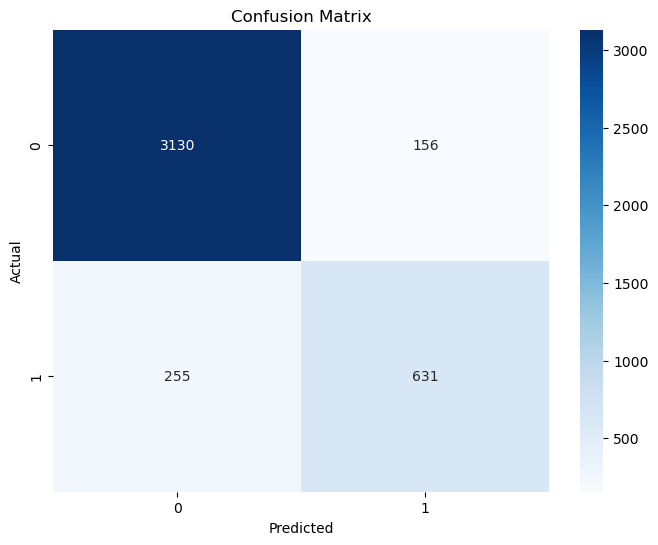

In [ ]:
# 1. Imports
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score


# 4. Remove any NaNs
training_data_df['Content'] = training_data_df['Content'].fillna('')

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    training_data_df['Content'], 
    training_data_df['Label'], 
    test_size=0.2, 
    random_state=42,
    stratify=training_data_df['Label']  # to maintain class balance
)

# 6. TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 7. Logistic Regression with Grid Search
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'class_weight': [None, 'balanced'],
    'solver': ['liblinear'],  # good for small datasets & L1 penalty
}

grid = GridSearchCV(
    LogisticRegression(max_iter=2000),
    param_grid,
    cv=5,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

grid.fit(X_train_tfidf, y_train)

# 8. Evaluation
best_log_reg = grid.best_estimator_
y_pred = best_log_reg.predict(X_test_tfidf)

print("Best Params:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Not Malicious', 'Malicious']))

# confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=best_log_reg.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_log_reg.classes_, yticklabels=best_log_reg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Save the model and vectorizer

#Accuracy = (TP + TN) / (TP + TN + FP + FN)
# = (2924 + 779) / (2924 + 779 + 362 + 107 ) = 0.8876


In [8]:
# 1. Define new texts
new_texts = [
    "Fuck this place.", 
    "What a beautiful day, feeling grateful!",
    "I love you",
    "can't wait till i get my full appetite back. only ate a half ghetto sandwich. no lettuce, no nothing.",
    "Dumb ass bitch",
    "you’re such a dumbass 🤡 nobody wants you around 💩", #testing malicious tweets with emojis
    "go back to your country 🖕",
    "🖕🤡🖕",
    "You're such a clown 🤡 lol",
    "I hate you"
]

# 2. Transform new texts with the same TF-IDF vectorizer
new_texts_tfidf = vectorizer.transform(new_texts)

# 3. Predict using the trained logistic regression model
predictions = best_log_reg.predict(new_texts_tfidf)

# 4. Print results with readable labels
labels = ['Not Malicious', 'Malicious']
for text, pred in zip(new_texts, predictions):
    print(f"Text: {text}\nPrediction: {labels[pred]}\n")


Text: Fuck this place.
Prediction: Malicious

Text: What a beautiful day, feeling grateful!
Prediction: Not Malicious

Text: I love you
Prediction: Malicious

Text: can't wait till i get my full appetite back. only ate a half ghetto sandwich. no lettuce, no nothing.
Prediction: Malicious

Text: Dumb ass bitch
Prediction: Malicious

Text: you’re such a dumbass 🤡 nobody wants you around 💩
Prediction: Malicious

Text: go back to your country 🖕
Prediction: Malicious

Text: 🖕🤡🖕
Prediction: Not Malicious

Text: You're such a clown 🤡 lol
Prediction: Malicious

Text: I hate you
Prediction: Malicious

